In [8]:
import cv2
import matplotlib.pyplot as py
from PIL import Image
import numpy as np
import pandas as pd
import os

dataset = "datasetocr/Font/Font"

label = []
for folder in os.listdir(dataset):
    label.append(folder)

# label[29] = 'a'
# label[30] = 'b'
# label[31] = 'c'
# label[32] = 'd'
# label[33] = 'e'
# label[34] = 'f'
# label[35] = 'g'
# label[36] = 'h'
# label[37] = 'i'
# label[38] = 'j'
# label[39] = 'k'
# label[40] = 'l'
# label[41] = 'm'
# label[42] = 'n'
# label[43] = 'o'
# label[44] = 'p'
# label[45] = 'q'
# label[46] = 'r'
# label[47] = 's'
# label[48] = 't'
# label[49] = 'u'
# label[50] = 'v'
# label[51] = 'w'
# label[52] = 'x'
# label[53] = 'y'
# label[54] = 'z'

# label.sort()

print("Label ", label)
print("Number of Class ", len(label))

Label  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'Sample037', 'Sample038', 'Sample039', 'Sample040', 'Sample041', 'Sample042', 'Sample043', 'Sample044', 'Sample045', 'Sample046', 'Sample047', 'Sample048', 'Sample049', 'Sample050', 'Sample051', 'Sample052', 'Sample053', 'Sample054', 'Sample055', 'Sample056', 'Sample057', 'Sample058', 'Sample059', 'Sample060', 'Sample061', 'Sample062', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Number of Class  62


In [9]:

#Preprocessing
## resize, grayscale, smoothing, thresholding img
def preprocessing(img):
    #Resize
    scale_percent=1
    width=int(img.shape[1]*scale_percent)
    height=int(img.shape[0]*scale_percent)
    dimension=(width,height)

    resized=cv2.resize(img,dimension,interpolation=cv2.INTER_AREA)
    
    #Convert to Grayscale
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

    #Smoothing Gaussian Blur
    blurred = cv2.GaussianBlur(gray,(3,3),0)

    #Get threshold
    (T, threshInv) = cv2.threshold(blurred, 180, 255,
                                    cv2.THRESH_BINARY_INV)

    img = threshInv

    return img
def crop_img(img):
    cnts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x[0]))
    results = []
    for c in cnts:
        x, y, w, h = cv2.boundingRect(c)
        roi = img[y:y+h, x:x+w]
        results.append(roi)

    char = results[0]
    char = cv2.resize(char, (64,64))

    (T, threshInv) = cv2.threshold(char, 180, 255,
                                cv2.THRESH_BINARY)
    
    img = threshInv
    
    return img

def horizontal_projection(img):
    #convert black spots to ones
    img[img == 0] = 1
    #convert white spots to zeros
    img[img == 255] = 0

    horizontal_projection = np.sum(img, axis = 1)
#     print("Horizontal Projection value: \n", horizontal_projection)
    return horizontal_projection

def vertical_projection(img):
    #convert black spots to ones
    img[img == 0] = 1
    #convert white spots to zeros
    img[img == 255] = 0

    vertical_projection = np.sum(img, axis = 0)
#     print("Horizontal Projection value: \n", vertical_projection)
    return vertical_projection

In [10]:
image_vec = []
cc_img = []
target_data = []
for folder in os.listdir(dataset):
    for filename in os.listdir(dataset + '/' + folder)[:1000]:
        if filename.find('.png') < 0:
            continue
        img = cv2.imread(dataset + '/' + folder + '/' + filename, 1)
        img_copy = img.copy()
        vp_img = vertical_projection(crop_img(preprocessing(img)))
        hp_img = horizontal_projection(crop_img(preprocessing(img_copy)))
        cc_img.append(hp_img)
        cc_img.append(vp_img)
        cc_img_arr = np.array(cc_img)
        cc_img_arr = cc_img_arr.flatten()
        image_vec.append(cc_img_arr)
        idx = label.index(folder)
        target_data.append(idx)
        cc_img = []

len(image_vec)

62000

In [14]:
# image_vec[0].shape

(128,)

In [4]:
# image_vec[0].reshape(-1,128)

array([[12,  8,  4,  2,  0, 32, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34,
        34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34,
        34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34,
        34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 32,  0,  2,  4,  8, 12,
         8,  8,  4,  4,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0, 52,
        54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
        54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
        52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  2,  4,  4,  6,  6]],
      dtype=uint32)

In [11]:
x = np.float32(image_vec).reshape(-1,128)
y = np.array(target_data)

x.shape, y.shape

((62000, 128), (62000,))

# Train Dataset

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
clf = SVC(kernel='linear', class_weight='balanced')
clf = clf.fit(x_train, y_train)

# Split Dataset

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.9, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((55800, 128), (6200, 128), (55800,), (6200,))

# Train model

In [ ]:
svm = cv2.ml.SVM_create()
svm.setKernel(cv2.ml.SVM_RBF)
svm.setType(cv2.ml.SVM_C_SVC)

In [ ]:
# do train
svm.train(x_train, cv2.ml.ROW_SAMPLE, y_train)

In [ ]:
svm.save('svm_model.dat')

# Apply prediction

In [ ]:
y_predict = svm.predict(x_test)[1]

# Evaluate Test Result

In [ ]:
mask = y_predict.T[0]==y_test
correct = np.count_nonzero(mask)
accuracy = correct*100.0/y_predict.size
print("accuracy : %.2f" % accuracy)

In [15]:

label[29] = 'a'
label[30] = 'b'
label[31] = 'c'
label[32] = 'd'
label[33] = 'e'
label[34] = 'f'
label[35] = 'g'
label[36] = 'h'
label[37] = 'i'
label[38] = 'j'
label[39] = 'k'
label[40] = 'l'
label[41] = 'm'
label[42] = 'n'
label[43] = 'o'
label[44] = 'p'
label[45] = 'q'
label[46] = 'r'
label[47] = 's'
label[48] = 't'
label[49] = 'u'
label[50] = 'v'
label[51] = 'w'
label[52] = 'x'
label[53] = 'y'
label[54] = 'z'

label.sort()

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, Ypredict, target_names=label))

              precision    recall  f1-score   support

           0       0.59      0.58      0.58        97
           1       0.90      0.88      0.89       108
           2       0.88      0.92      0.90        88
           3       0.89      0.92      0.91       100
           4       0.98      0.99      0.98        91
           5       0.92      0.87      0.89       106
           6       0.90      0.94      0.92       109
           7       0.98      0.99      0.99       108
           8       0.91      0.86      0.88       100
           9       0.89      0.94      0.92        98
           A       0.92      0.97      0.94        93
           B       0.86      0.87      0.86       104
           C       0.80      0.84      0.82       109
           D       0.82      0.89      0.86       100
           E       0.82      0.91      0.86       107
           F       0.94      0.95      0.95       101
           G       0.92      0.95      0.93        83
           H       0.81    

In [20]:
from sklearn.metrics import confusion_matrix
import sys

In [21]:
np.set_printoptions(threshold=sys.maxsize)

In [22]:
cm = confusion_matrix(y_test,Ypredict)
display(cm)

array([[ 56,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,
          0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   2,  16,   0,
          3,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   1,   0,
          0,   0,   0,   1,  15,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  95,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   1,   2,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   2,   0,
          0,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0,  81,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,
          1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
      

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [29]:
from sklearn.metrics import plot_confusion_matrix

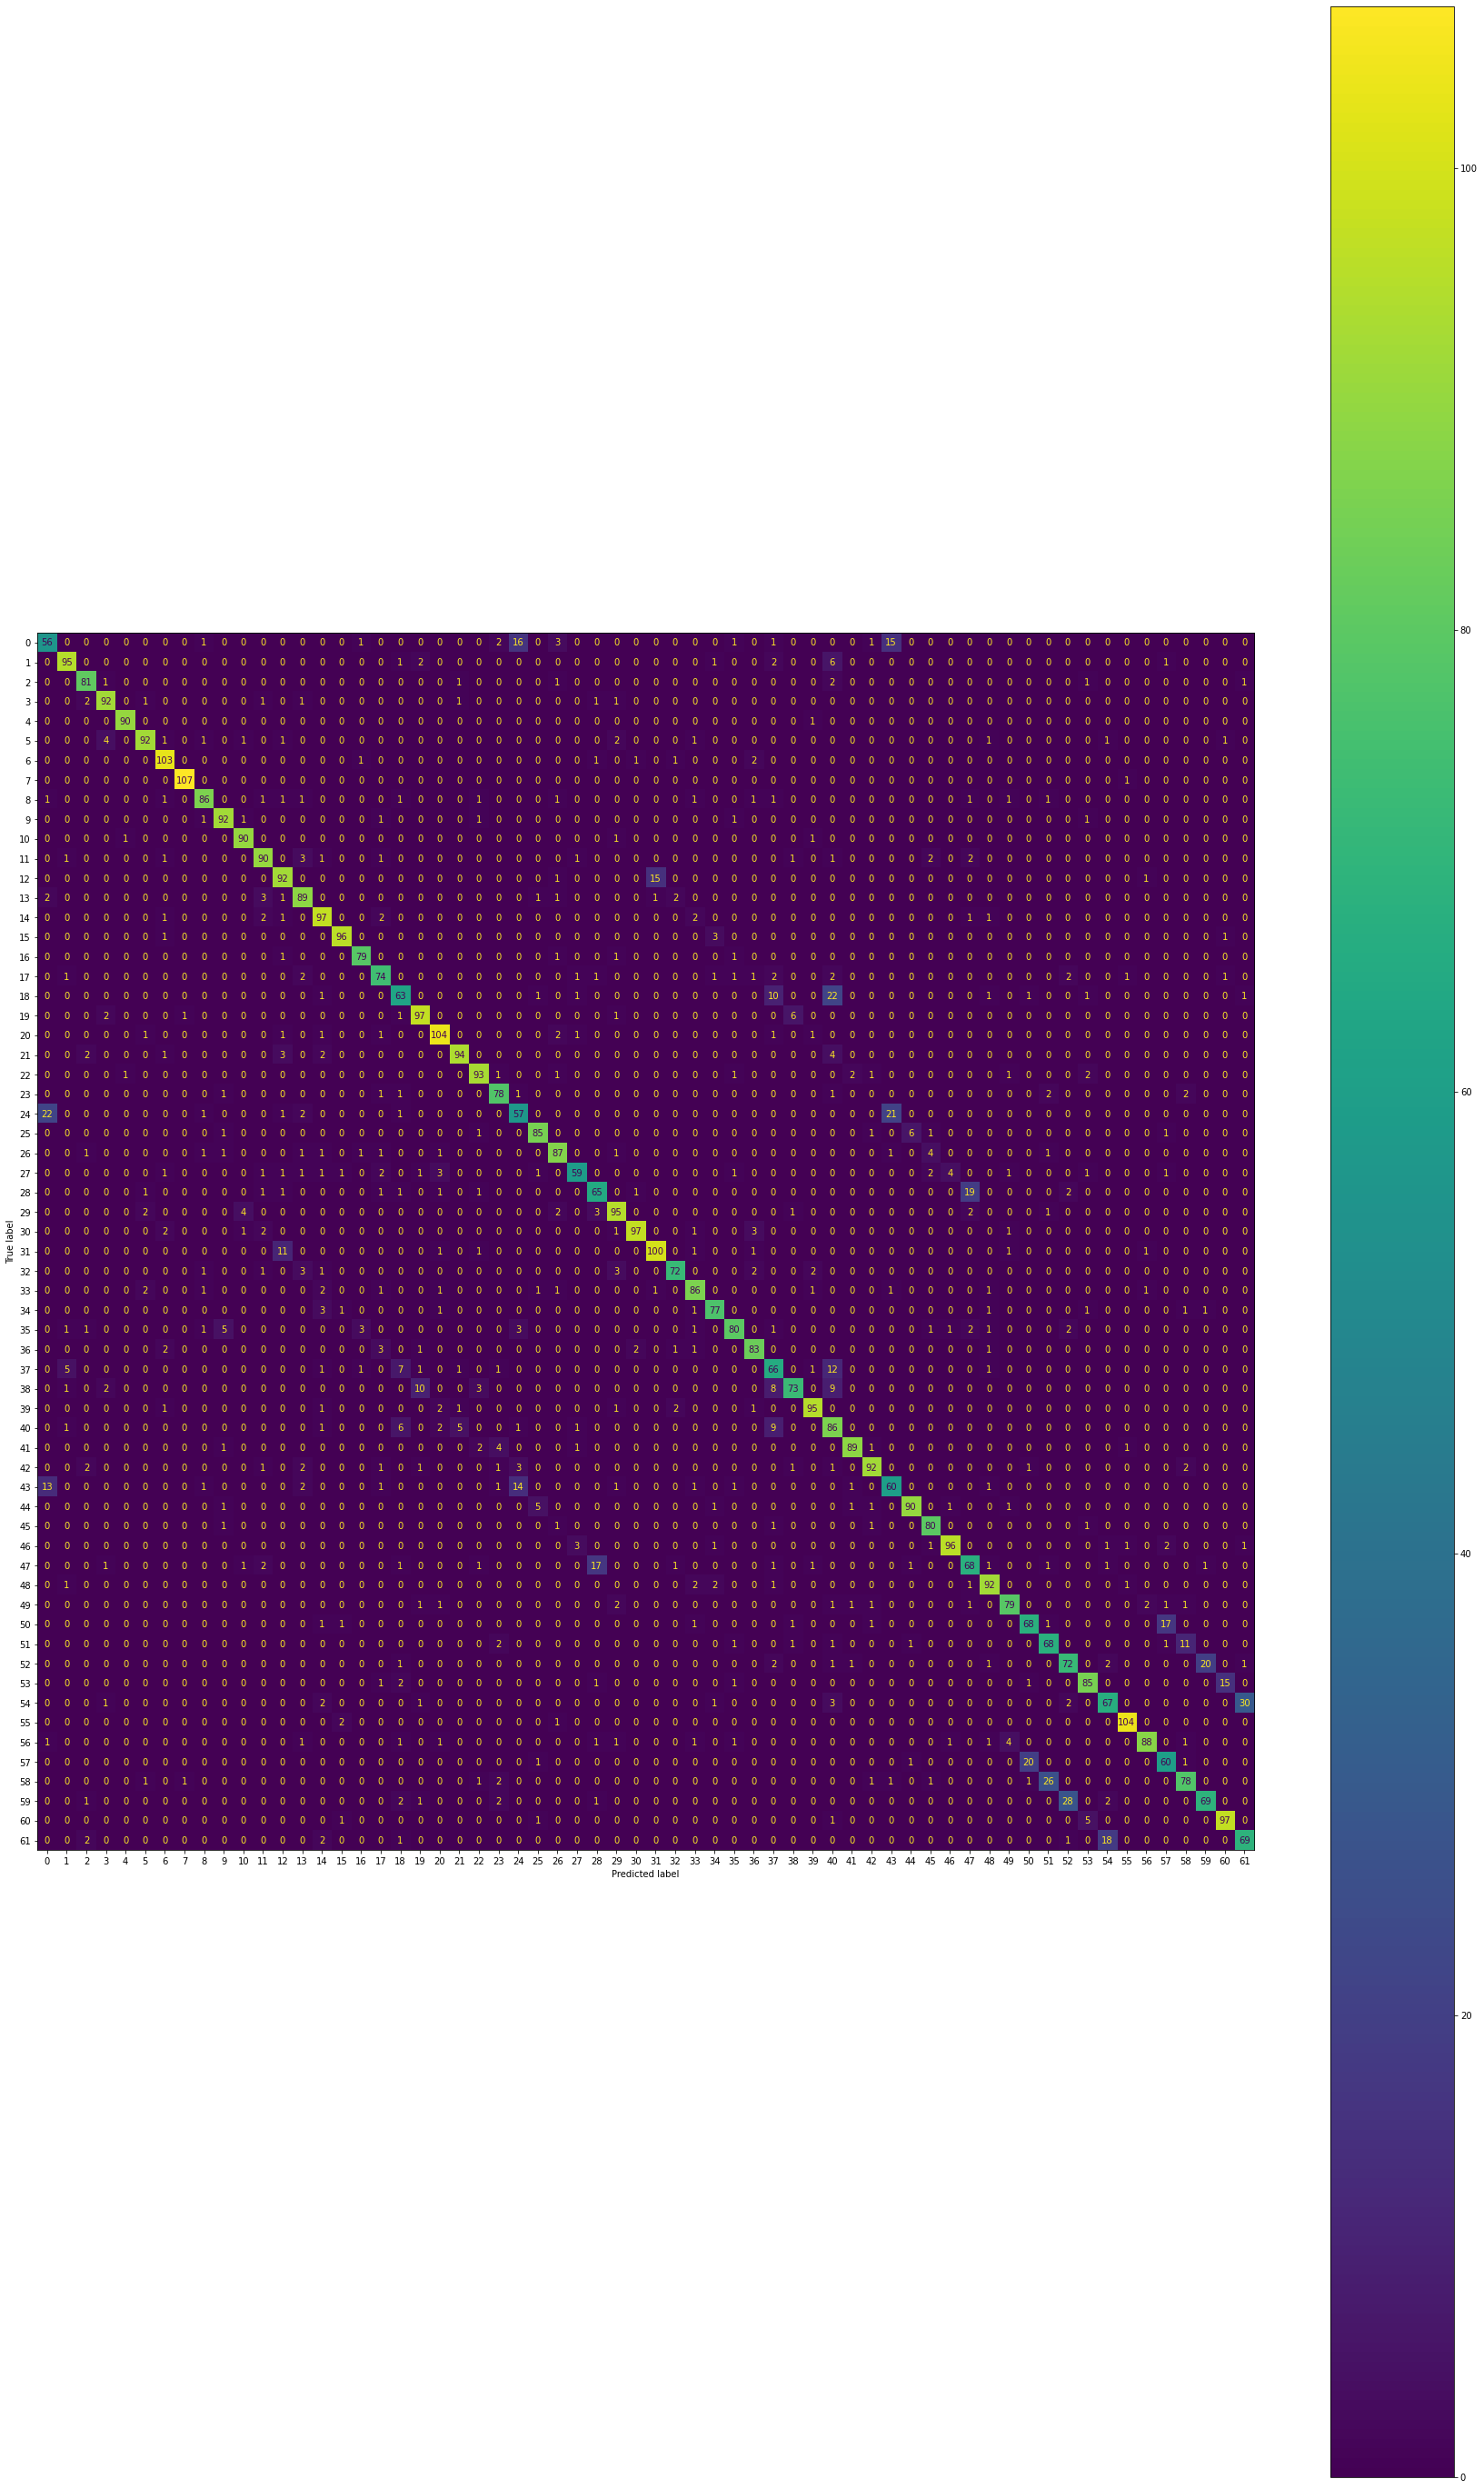

In [38]:
matrix = plot_confusion_matrix(pickle_model, x_test, y_test)
plt.gcf().set_size_inches(30,50)
plt.savefig('confusion.jpg')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
param_grid = {'C': [2.67],
              'gamma': [5.383], }
clf = SVC(kernel='linear', class_weight='balanced')
clf = clf.fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred, target_names=label))

In [4]:
import pickle

In [5]:
svm_filename = "svm_model.pkl"

In [ ]:

with open(svm_filename, 'wb') as file:
    pickle.dump(clf, file)

In [6]:
with open(svm_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    

In [13]:
score = pickle_model.score(x_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(x_test)

Test score: 83.29 %
